In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


Exploring the columns, the data types, and whether there are an missing values

In [4]:
df['shop_id'].unique().size

100

Double checking that there are 100 sneaker shops

In [5]:
df.sort_values(by='created_at',ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
145,146,72,906,640,4,cash,2017-03-30 9:55:00
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40
244,245,32,928,202,2,cash,2017-03-30 9:30:28
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
...,...,...,...,...,...,...,...
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19


Double checking that the data is for a 30- day window

In [6]:
aov = df['order_amount'].mean()
aov

3145.128

Average order value is calculated by taking the total revenue and dividing that by the number of orders

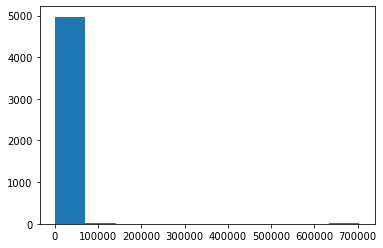

In [7]:
plt.hist(df['order_amount'],bins=10);

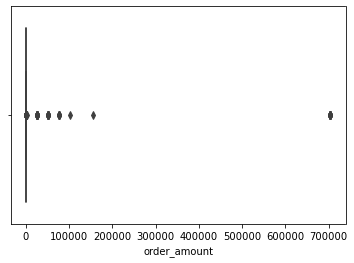

In [8]:
sns.boxplot(x=df['order_amount']);

In [9]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

The average order value was calculated properly but there was no consideration for outliers

In [10]:
wo_outliers = [x for x in df['order_amount'] if x < 126_993]
sum(wo_outliers)/ len(wo_outliers)

723.2617422721798

First, I looked at values more than 3 standard deviations from the mean to account for 99.7% of the data and calculated the average order amount

In [11]:
df_shop = df.groupby('shop_id').mean().sort_values(by='order_amount',ascending=False)
df_shop.head()

,order_id,user_id,order_amount,total_items
shop_id,,,,
42,2441.921569,758.588235,235101.490196,667.901961
78,2663.021739,867.739130,49213.043478,1.913043
50,2162.431818,834.500000,403.545455,2.090909
90,2694.163265,839.857143,403.224490,2.265306
38,2639.714286,837.800000,390.857143,2.057143


Then, I looked at each shop to determine the average order amount by store and saved it to a new dataframe

In [12]:
df_shop = df_shop.drop(index=[42,78])

I dropped the stores that had an average order amount above the average order amount without outliers 

In [13]:
df_shop.head()

,order_id,user_id,order_amount,total_items
shop_id,,,,
50,2162.431818,834.500000,403.545455,2.090909
90,2694.163265,839.857143,403.224490,2.265306
38,2639.714286,837.800000,390.857143,2.057143
81,2685.627119,835.881356,384.000000,2.169492
6,2431.915254,844.372881,383.508475,2.050847


In [14]:
df_shop['order_amount'].mean()

299.6823991261549

I took the average order amount between the remaining stores